In [2]:
"""
Case Dashboard Description: 
Create a dashboard to track trends in COVID-19 cases and deaths. 
Expected Outcome: 
• Line chart: Daily cases 
• Bar chart: Total cases by country 
• Pie chart: Recovery vs Death rate 
Input: 
Date, Country, New Cases, Deaths, Recovered
"""

'\nCase Dashboard Description: \nCreate a dashboard to track trends in COVID-19 cases and deaths. \nExpected Outcome: \n• Line chart: Daily cases \n• Bar chart: Total cases by country \n• Pie chart: Recovery vs Death rate \nInput: \nDate, Country, New Cases, Deaths, Recovered\n'

# Load the data

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("full_grouped.csv")
df

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
35151,2020-07-27,West Bank and Gaza,10621,78,3752,6791,152,2,0,Eastern Mediterranean
35152,2020-07-27,Western Sahara,10,1,8,1,0,0,0,Africa
35153,2020-07-27,Yemen,1691,483,833,375,10,4,36,Eastern Mediterranean
35154,2020-07-27,Zambia,4552,140,2815,1597,71,1,465,Africa


# Data Preprocessing

In [52]:
covid=df.drop(columns=['Confirmed','New deaths','New recovered','WHO Region'])

In [53]:
covid=covid.rename(columns={'Country/Region':'country'})

In [54]:
covid

,Date,country,Deaths,Recovered,Active,New cases
0,2020-01-22,Afghanistan,0,0,0,0
1,2020-01-22,Albania,0,0,0,0
2,2020-01-22,Algeria,0,0,0,0
3,2020-01-22,Andorra,0,0,0,0
4,2020-01-22,Angola,0,0,0,0
...,...,...,...,...,...,...
35151,2020-07-27,West Bank and Gaza,78,3752,6791,152
35152,2020-07-27,Western Sahara,1,8,1,0
35153,2020-07-27,Yemen,483,833,375,10
35154,2020-07-27,Zambia,140,2815,1597,71


In [55]:
# Null Values
covid.isnull().sum()

Date         0
country      0
Deaths       0
Recovered    0
Active       0
New cases    0
dtype: int64

In [56]:
# Duplicate Values
covid.duplicated().sum()

0

In [14]:
# Dataset Statistics
covid.describe()

,Deaths,Recovered,Active,New cases
count,35156.000000,3.515600e+04,3.515600e+04,35156.00000
mean,1234.068239,1.104813e+04,1.128443e+04,469.36375
std,7437.238354,6.454640e+04,8.997149e+04,3005.86754
min,0.000000,0.000000e+00,-2.000000e+00,0.00000
25%,0.000000,0.000000e+00,0.000000e+00,0.00000
50%,4.000000,3.300000e+01,8.500000e+01,2.00000
75%,78.250000,1.286250e+03,1.454000e+03,75.00000
max,148011.000000,1.846641e+06,2.816444e+06,77255.00000


# • Line chart: Daily cases 

D:\ana\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\ana\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Date', ylabel='Active'>

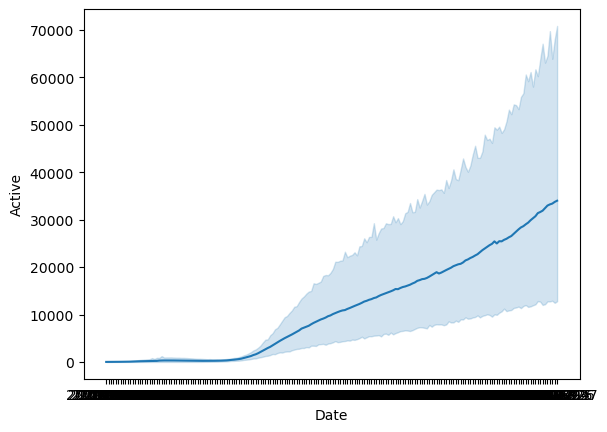

In [9]:
sns.lineplot(data=df,x='Date',y='Active')

<Axes: xlabel='Date'>

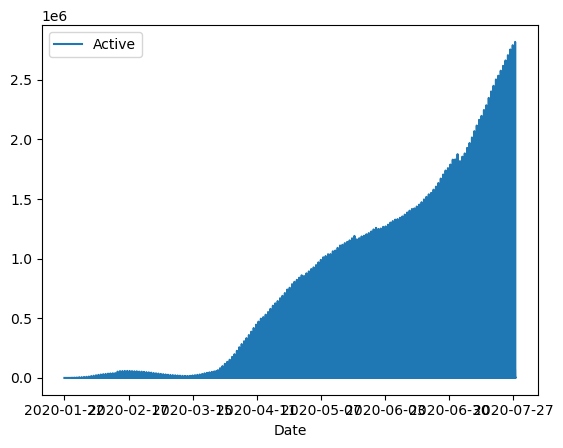

In [10]:
df.plot.line(x="Date",y="Active")

# • Bar chart: Total cases by country 

In [41]:
df1=covid.groupby(['country']).sum()
covid["country"]
df1['Active']

country
Afghanistan           1089052
Albania                 72117
Algeria                345886
Andorra                 19907
Angola                  15011
                       ...   
West Bank and Gaza     170967
Western Sahara            190
Yemen                   25694
Zambia                  43167
Zimbabwe                37706
Name: Active, Length: 187, dtype: int64

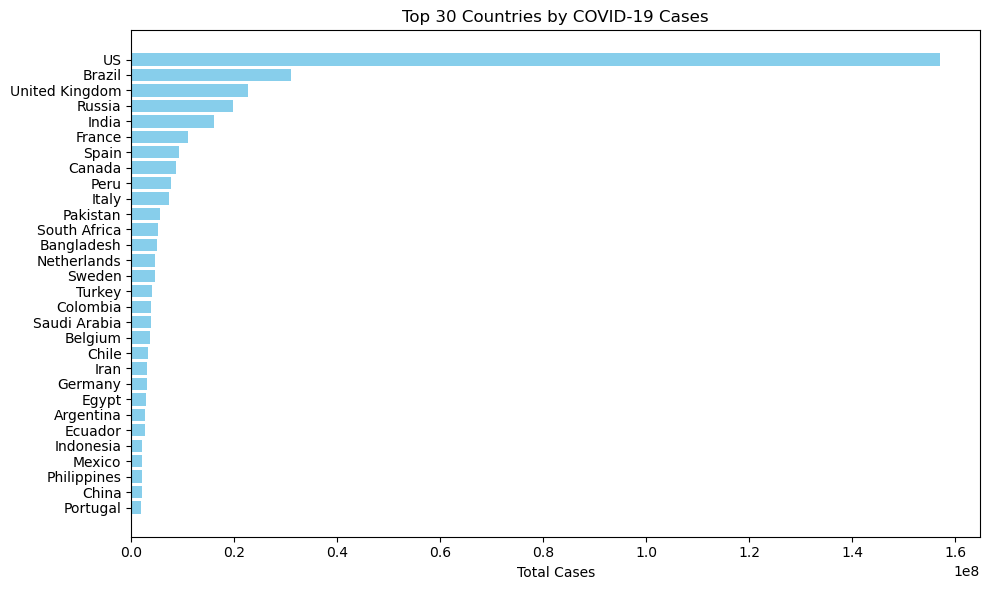

In [49]:
import matplotlib.pyplot as plt

# Group by country and sum all numeric columns
df1 = covid.groupby('country').sum(numeric_only=True)

# Sort and get top 10 countries
top = df1.sort_values(by='Active', ascending=False).head(30)

# Plot
plt.figure(figsize=(10,6))
plt.barh(top.index, top['Active'], color='skyblue')
plt.xlabel("Total Cases")
plt.title("Top 30 Countries by COVID-19 Cases")
plt.gca().invert_yaxis()  # Highest at top
plt.tight_layout()
plt.show()

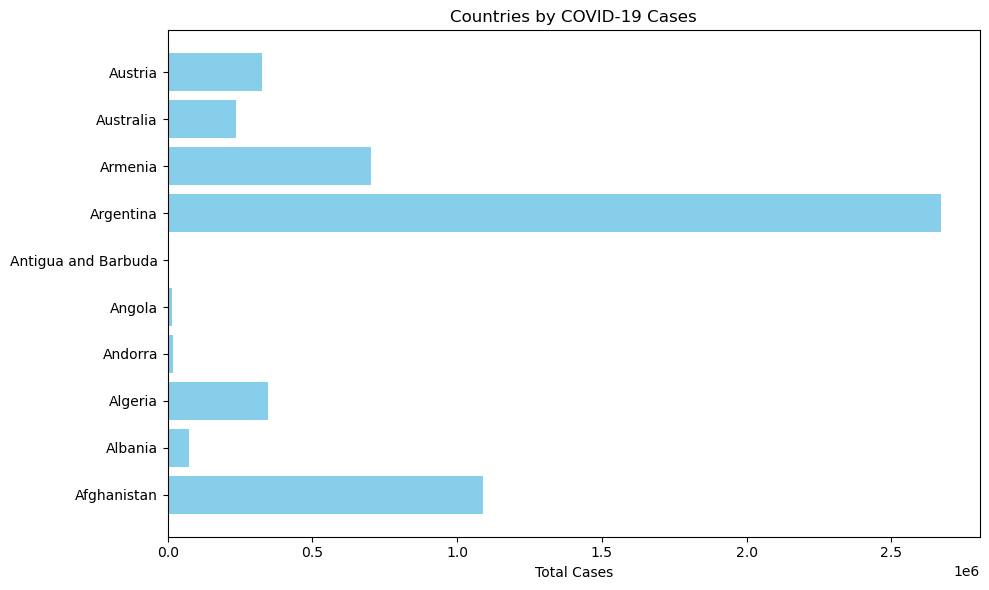

In [46]:
import matplotlib.pyplot as plt

# Group by country and sum all numeric columns
df1 = covid.groupby('country').sum(numeric_only=True).head(10)

# Plot
plt.figure(figsize=(10,6))
plt.barh(df1.index, df1['Active'], color='skyblue')
plt.xlabel("Total Cases")
plt.title("Countries by COVID-19 Cases")
plt.tight_layout()
plt.show()

In [17]:
covid.to_csv("covid.csv")

# • Pie chart: Recovery vs Death rate 

In [59]:
#covid["Recovered"].value_counts()
def rate(column):
    count=0
    sum=0
    for i in column:
        sum+=i
        count+=1
    return sum/count

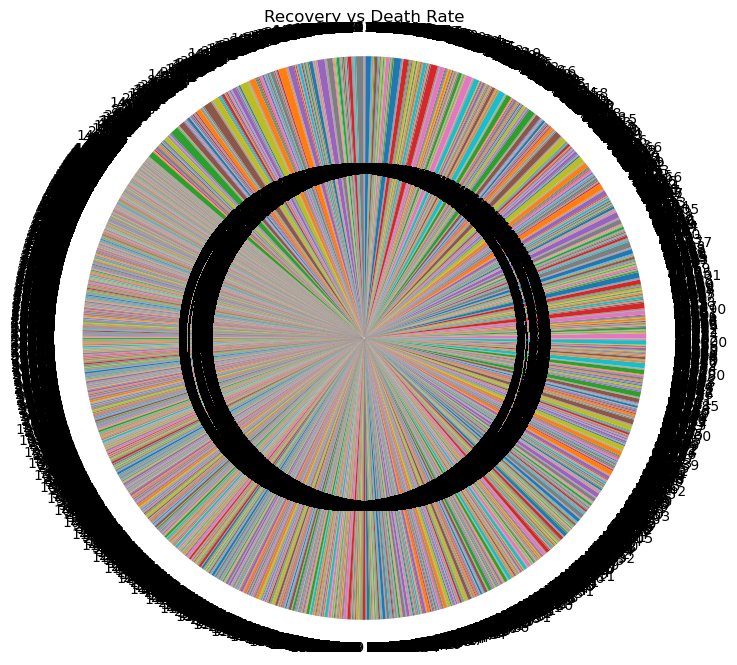

In [64]:
recovery_rate=rate(covid["Recovered"])
death_rate=rate(covid["Deaths"])

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(covid["Recovered"], labels=covid["Deaths"], autopct='%1.1f%%', startangle=140)
plt.title('Recovery vs Death Rate')
plt.axis('equal')  # Equal aspect ratio ensures pie is a circle
plt.show()